# Model Building

In [3]:
import numpy as np
data=np.load('data.npy')
target=np.load('target.npy')


In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [5]:
model=Sequential()
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:])) #note added below
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))                #1st cnn layer  
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))                #2nd cnn layer
model.add(Flatten())                                    #flatten layer to stack the output convolutions fromsecond convolution layer
model.add(Dropout(0.5))                                 #Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction (in this case, 50%) of input units to zero during training. This introduces noise to the model and prevents it from relying too much on specific features during training
model.add(Dense(50,activation='relu'))                  #dense layer of 50 neurons
model.add(Dense(2,activation='softmax'))                #the final layer with two outputs for two categories
          

In [6]:
data.shape[1:]

(100, 100, 1)

In [7]:
#Conv2D: This is the type of layer adding, a 2D convolutional layer
#200: This is the number of filters (or kernels) in the convolutional layer. Each filter learns different patterns in the input data.
#(3, 3): This is the size of each filter. In this case, it's a 3x3 filter. Smaller filter sizes are common in the initial layers of a convolutional neural network.
#input_shape=data.shape[1:]: This specifies the shape of the input data that will be fed into this layer.



#Max pooling is a downsampling operation that reduces the spatial dimensions of the input data. In this case, it uses a pool size of (2,2), meaning it takes the maximum value from a 2x2 region of the input.

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
#history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)
history = model.fit(train_data, train_target, epochs=20, callbacks=[checkpoint], validation_data=(test_data, test_target))




Epoch 1/20
39/39 [==============================] - ETA: 0s - loss: 0.6949 - accuracy: 0.5533

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


39/39 [==============================] - 55s 1s/step - loss: 0.6949 - accuracy: 0.5533 - val_loss: 0.6193 - val_accuracy: 0.6594
Epoch 2/20
39/39 [==============================] - ETA: 0s - loss: 0.5390 - accuracy: 0.7254

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


39/39 [==============================] - 49s 1s/step - loss: 0.5390 - accuracy: 0.7254 - val_loss: 0.4902 - val_accuracy: 0.7609
Epoch 3/20
39/39 [==============================] - ETA: 0s - loss: 0.3506 - accuracy: 0.8578

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


39/39 [==============================] - 51s 1s/step - loss: 0.3506 - accuracy: 0.8578 - val_loss: 0.3389 - val_accuracy: 0.8768
Epoch 4/20
39/39 [==============================] - ETA: 0s - loss: 0.2267 - accuracy: 0.9160

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


39/39 [==============================] - 50s 1s/step - loss: 0.2267 - accuracy: 0.9160 - val_loss: 0.2686 - val_accuracy: 0.8986
Epoch 5/20
39/39 [==============================] - ETA: 0s - loss: 0.2021 - accuracy: 0.9330

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


39/39 [==============================] - 53s 1s/step - loss: 0.2021 - accuracy: 0.9330 - val_loss: 0.2388 - val_accuracy: 0.9058
Epoch 6/20
39/39 [==============================] - ETA: 0s - loss: 0.1984 - accuracy: 0.9313

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


39/39 [==============================] - 54s 1s/step - loss: 0.1984 - accuracy: 0.9313 - val_loss: 0.2037 - val_accuracy: 0.9203
Epoch 7/20
39/39 [==============================] - ETA: 0s - loss: 0.1259 - accuracy: 0.9596

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


39/39 [==============================] - 57s 1s/step - loss: 0.1259 - accuracy: 0.9596 - val_loss: 0.1778 - val_accuracy: 0.9203
Epoch 8/20
39/39 [==============================] - ETA: 0s - loss: 0.0994 - accuracy: 0.9661

INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


39/39 [==============================] - 52s 1s/step - loss: 0.0994 - accuracy: 0.9661 - val_loss: 0.1436 - val_accuracy: 0.9420
Epoch 9/20
39/39 [==============================] - 51s 1s/step - loss: 0.0913 - accuracy: 0.9669 - val_loss: 0.1520 - val_accuracy: 0.9420
Epoch 10/20
39/39 [==============================] - 54s 1s/step - loss: 0.0641 - accuracy: 0.9790 - val_loss: 0.1757 - val_accuracy: 0.9493
Epoch 11/20
39/39 [==============================] - 53s 1s/step - loss: 0.0573 - accuracy: 0.9814 - val_loss: 0.1465 - val_accuracy: 0.9493
Epoch 12/20
39/39 [==============================] - 52s 1s/step - loss: 0.0612 - accuracy: 0.9742 - val_loss: 0.1565 - val_accuracy: 0.9565
Epoch 13/20
39/39 [==============================] - ETA: 0s - loss: 0.0712 - accuracy: 0.9742

INFO:tensorflow:Assets written to: model-013.model\assets


INFO:tensorflow:Assets written to: model-013.model\assets


39/39 [==============================] - 54s 1s/step - loss: 0.0712 - accuracy: 0.9742 - val_loss: 0.1362 - val_accuracy: 0.9565
Epoch 14/20
39/39 [==============================] - 53s 1s/step - loss: 0.0335 - accuracy: 0.9879 - val_loss: 0.1381 - val_accuracy: 0.9638
Epoch 15/20
39/39 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9830

INFO:tensorflow:Assets written to: model-015.model\assets


INFO:tensorflow:Assets written to: model-015.model\assets


39/39 [==============================] - 61s 2s/step - loss: 0.0476 - accuracy: 0.9830 - val_loss: 0.1329 - val_accuracy: 0.9638
Epoch 16/20
39/39 [==============================] - ETA: 0s - loss: 0.0670 - accuracy: 0.9798

INFO:tensorflow:Assets written to: model-016.model\assets


INFO:tensorflow:Assets written to: model-016.model\assets


39/39 [==============================] - 57s 1s/step - loss: 0.0670 - accuracy: 0.9798 - val_loss: 0.1314 - val_accuracy: 0.9565
Epoch 17/20
39/39 [==============================] - 53s 1s/step - loss: 0.0258 - accuracy: 0.9943 - val_loss: 0.1396 - val_accuracy: 0.9565
Epoch 18/20
39/39 [==============================] - 56s 1s/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.1747 - val_accuracy: 0.9420
Epoch 19/20
39/39 [==============================] - 53s 1s/step - loss: 0.0292 - accuracy: 0.9887 - val_loss: 0.1516 - val_accuracy: 0.9638
Epoch 20/20
39/39 [==============================] - 53s 1s/step - loss: 0.0208 - accuracy: 0.9919 - val_loss: 0.1632 - val_accuracy: 0.9710


In [9]:
#creating a callback in Keras for model training. Specifically, it is using the ModelCheckpoint callback, which is designed to save the model during training

#'model-{epoch:03d}.model': This is the file name template for the saved models. The {epoch:03d} part is a placeholder that gets replaced by the epoch number during training. It ensures that the saved models are named with a three-digit epoch number, helping with proper sorting.

#monitor='val_loss': This specifies the metric to monitor for deciding the best model. In this case, it's monitoring the validation loss (val_loss). The model will be saved when the validation loss improves.

#verbose=0: This parameter controls the verbosity of the output. Setting it to 0 means silent mode, where no information about the saving process is printed to the console during training.

#save_best_only=True: This ensures that only the best model, based on the monitored metric (validation loss in this case), will be saved. If save_best_only is set to True, the callback will only overwrite the saved model file when there is an improvement in the monitored metric.

#mode='auto': This parameter defines whether the monitoring metric should be minimized or maximized. Setting it to 'auto' allows Keras to infer the direction based on the metric being monitored.


In [10]:
#callbacks=[checkpoint]: This is a list of callbacks to apply during training. In this case, you're using the ModelCheckpoint callback to save the best model.


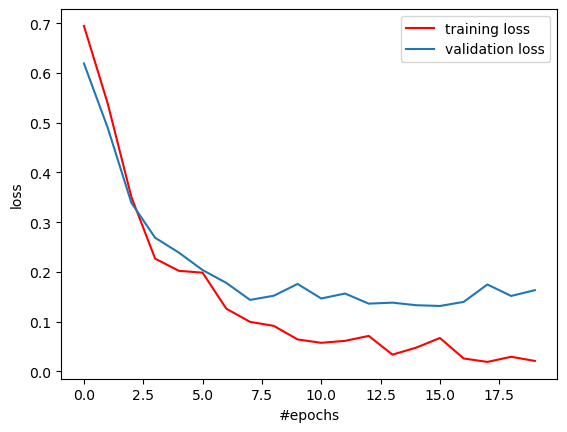

In [11]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


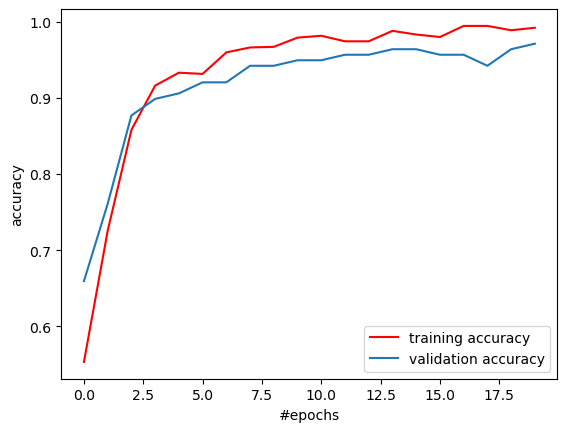

In [12]:

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('#epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



In [ ]:
model.save('facedetector.h5')